# ProjectNetwork

*This Jupyter Notebook is simply a demonstration of the functions we developed, and should only be used while reading the associated report of README file.*

## 2 - File Conversion

In [1]:
import networkx as nx
import ReadTSV
#help(ReadTSV)

In [2]:
G=ReadTSV.data_to_digraph('body.tsv')
print('G is of type {}, with {} nodes and {} edges'.format(type(G),len(G.nodes),len(G.edges)))

G is of type <class 'networkx.classes.multidigraph.MultiDiGraph'>, with 35776 nodes and 286561 edges


A typical post from the dataset is represented as follows:

In [3]:
G['cats']['dogs'][0]

{'POST_ID': '22j2pz',
 'TIMESTAMP': '2014-04-08 10:56:37',
 'POST_LABEL': 1,
 'POST_PROPERTIES': '891.0,739.0,0.753086419753,0.00785634118967,0.0246913580247,0.181818181818,0.0572390572391,165.0,111.0,20.0,4.18181818182,35.0,0.406060606061,9.0,8.0,97.6666666667,18.3333333333,13.1706666667,0.125,0.073,0.85,0.5240963855421686,0.12048192771084337,0.10843373493975904,0.06626506024096386,0.0,0.012048192771084338,0.03614457831325301,0.0,0.012048192771084338,0.07228915662650602,0.1566265060240964,0.0963855421686747,0.024096385542168676,0.1144578313253012,0.006024096385542169,0.03614457831325301,0.10843373493975904,0.04819277108433735,0.006024096385542169,0.05421686746987952,0.0,0.0,0.09036144578313253,0.0,0.006024096385542169,0.0,0.05421686746987952,0.04216867469879518,0.012048192771084338,0.006024096385542169,0.006024096385542169,0.0,0.1686746987951807,0.024096385542168676,0.006024096385542169,0.018072289156626505,0.04819277108433735,0.018072289156626505,0.0,0.03614457831325301,0.03012048192

## 3 - Getting in touch with the data structure

In [4]:
import Network_Analysis as NA
#help(NA)

### 3.3 - Degree distribution

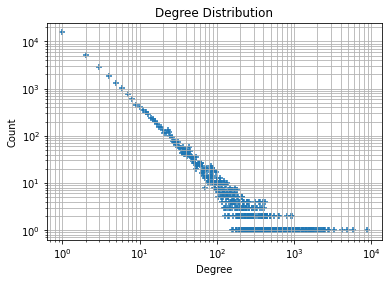

In [5]:
NA.Degree_distribution_plot(G)

### 3.4 - Degree cutting

Let us define a new graph, obtained by cutting the nodes with a degree lower than a threshold.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [7]:
GG=NA.degree_cut(G,3000)
print("The new graph has {} nodes and {} edges.".format(len(GG.nodes),len(GG.edges)))

The new graph has 5 nodes and 413 edges.


To plot this new graph, we designed a function allowing differential plotting for positive and negative interactions

Help on function GraphDraw in module Network_Analysis:

GraphDraw(GG, label_type=0)
    Draws a Graph. Checks wether it's a directed graph or a simple graph before.
    label_type corresponds to wether you want the total score of every edge (0)
    the positive score only (1), or the negative score (-1)



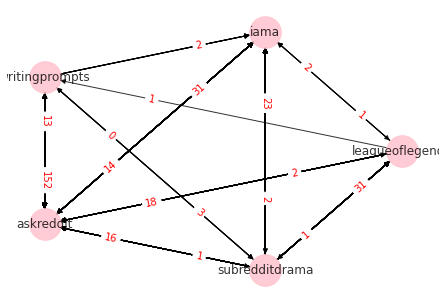

Positive interactions Graph


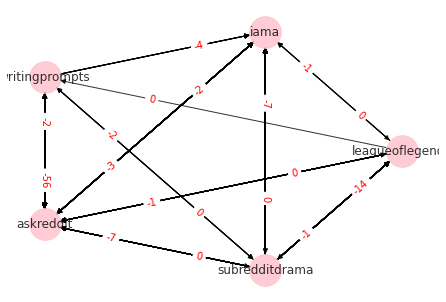

Negative interactions Graph


In [8]:
help(NA.GraphDraw)

NA.GraphDraw(GG,1)
print("Positive interactions Graph")
NA.GraphDraw(GG,-1)
print("Negative interactions Graph")

### 3.5 - Converting to non-multi Graph

In [9]:
Non_multi_G=NA.MultigraphToGraph(G)
print("The new graph is of type {}".format(type(Non_multi_G)))

The new graph is of type <class 'networkx.classes.digraph.DiGraph'>


## 4 - Data Analysis
### 4.1 - Simple reception metrics

In [10]:
positive_score, negative_score=NA.positive_negative_scores(G)
total_score={i:positive_score[i]-negative_score[i] for i in positive_score}
print("The most loved subreddit is {}, with a positive score of {}."
      .format(NA.Key_Max(positive_score,print_values=False),max(positive_score.values())))
print("The most hated subreddit is {}, with a negative score of {}."
      .format(NA.Key_Max(negative_score,print_values=False),max(negative_score.values())))
print("The most best scoring subreddit is {}, with a total score of {}."
      .format(NA.Key_Max(total_score,print_values=False),max(total_score.values())))

The most loved subreddit is askreddit, with a positive score of 6525.
The most hated subreddit is askreddit, with a negative score of 804.
The most best scoring subreddit is askreddit, with a total score of 5721.


### 4.2 - Simple emission metrics

In [11]:
positive_score, negative_score=NA.positive_negative_scores_emitters(G)
total_score={i:positive_score[i]-negative_score[i] for i in positive_score}
print("The most loving subreddit is {}, with a positive score of {}."
      .format(NA.Key_Max(positive_score,print_values=False),max(positive_score.values())))
print("The most hating subreddit is {}, with a negative score of {}."
      .format(NA.Key_Max(negative_score,print_values=False),max(negative_score.values())))
print("The most best scoring subreddit is {}, with a total score of {}."
      .format(NA.Key_Max(total_score,print_values=False),max(total_score.values())))

The most loving subreddit is subredditdrama, with a positive score of 3035.
The most hating subreddit is subredditdrama, with a negative score of 1630.
The most best scoring subreddit is outoftheloop, with a total score of 1836.


### 4.5 - General time growth of Reddit

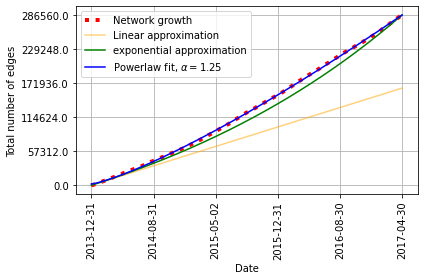

In [12]:
a,b=NA.Time_Growth(G)
NA.Plot_Time_Growth(a,b,fit=True)
plt.show()

## 5 - Communities of subreddits

Here is a direct application of our `Community_Detection` module, based on the Louvain algorithm.

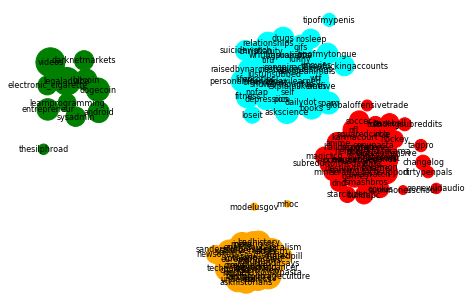

In [13]:
import Community_Detection as CD

# Cutting on degree
GG=NA.degree_cut(G,600)

# Defining a weight for the edges
_,l1,l2=NA.edge_evaluation(GG)
weight={i:l1[i] for i in l1}

# Making the MultiDiGraph a Graph
GGG=NA.DiGraphToGraph(NA.MultigraphToGraph(GG,l1))

partition = CD.plot_community(GGG)

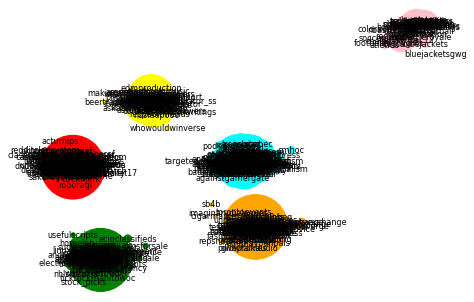

In [14]:
### A larger and more accurate example

GG=NA.degree_cut(G,150)
_,l1,l2=NA.edge_evaluation(GG)
weight={i:l1[i] for i in l1}
GGG=NA.DiGraphToGraph(NA.MultigraphToGraph(GG,l1))
partition = CD.plot_community(GGG,comscale=15.,nodscale=3.)